In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as **97 -- 99** are *missing* data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [2]:
# https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

data = pd.read_csv('../_data/Covid Data.csv')
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
data.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [5]:
data['DEATH'] = (data['DATE_DIED'] != '9999-99-99').map({True:1, False:0})

# Preprocessing:

In the Boolean features, 1 means "yes" and 2 means "no". values as 97 -- 99 are missing data.

In [6]:
for col in data.columns:
    if not(col in ['DATE_DIED', 'AGE', 'MEDICAL_UNIT', 'CLASIFFICATION_FINAL', 'DEATH']):
        data.loc[data[col] == 97, col] = np.nan
        data.loc[data[col] == 98, col] = np.nan
        data.loc[data[col] == 99, col] = np.nan
        
        data[col] = data[col].map({1:1, 2:0})

In [7]:
data.isna().sum() / data.shape[0] * 100

USMER                    0.000000
MEDICAL_UNIT             0.000000
SEX                      0.000000
PATIENT_TYPE             0.000000
DATE_DIED                0.000000
INTUBED                 81.622106
PNEUMONIA                1.526166
AGE                      0.000000
PREGNANT                50.283957
DIABETES                 0.318337
COPD                     0.286389
ASTHMA                   0.284100
INMSUPR                  0.324631
HIPERTENSION             0.296021
OTHER_DISEASE            0.481129
CARDIOVASCULAR           0.293350
OBESITY                  0.289154
RENAL_CHRONIC            0.286675
TOBACCO                  0.307083
CLASIFFICATION_FINAL     0.000000
ICU                     81.637651
DEATH                    0.000000
dtype: float64

In [8]:
intubed = data[(data['INTUBED'] == 1)].shape[0]
intubed_death = data[(data['INTUBED'] == 1) & (data['DEATH'] == 1)].shape[0]
print(intubed_death/intubed)

0.7838424055146185


In [9]:
data.drop(columns=['ICU', 'PREGNANT'], inplace=True)
data['INTUBED'] = data['INTUBED'].fillna(-1)
data = data.dropna().reset_index(drop=True)
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,0,1,1,1,03/05/2020,-1.0,1.0,65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1
1,0,1,0,1,03/06/2020,-1.0,1.0,72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,1
2,0,1,0,0,09/06/2020,1.0,0.0,55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,0,1,1,1,12/06/2020,-1.0,0.0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1
4,0,1,0,1,21/06/2020,-1.0,0.0,68,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025147,0,13,0,1,9999-99-99,-1.0,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0
1025148,1,13,0,0,9999-99-99,0.0,0.0,51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,0
1025149,0,13,0,1,9999-99-99,-1.0,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0
1025150,0,13,0,1,9999-99-99,-1.0,0.0,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0


# Data Visualization:

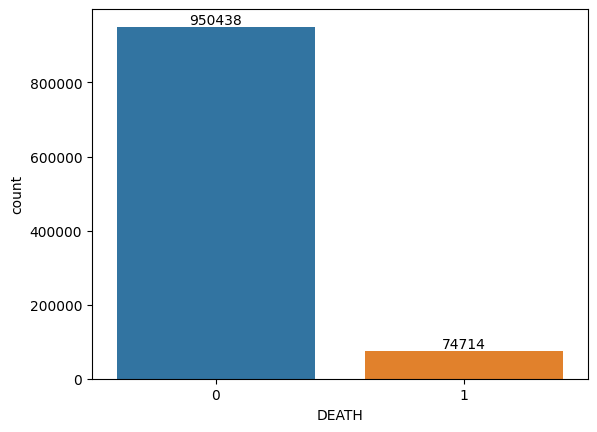

In [10]:
ax = sns.countplot(x='DEATH', data=data);
ax.bar_label(ax.containers[0]);

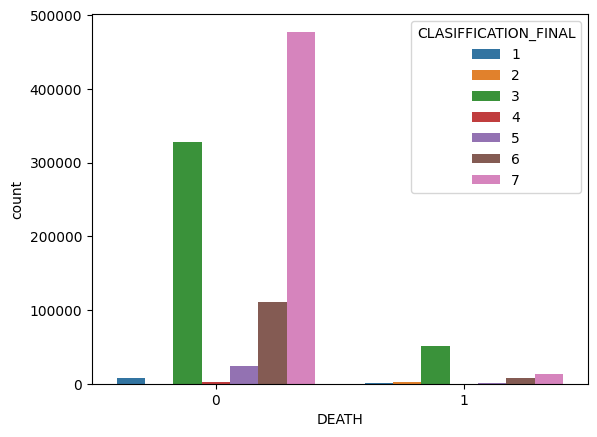

In [11]:
ax = sns.countplot(x='DEATH', data=data, hue='CLASIFFICATION_FINAL');
# ax.bar_label(ax.containers[0]);
# ax.bar_label(ax.containers[1]);
# ax.bar_label(ax.containers[2]);
# ax.bar_label(ax.containers[3]);
# ax.bar_label(ax.containers[4]);
# ax.bar_label(ax.containers[5]);
# ax.bar_label(ax.containers[6]);

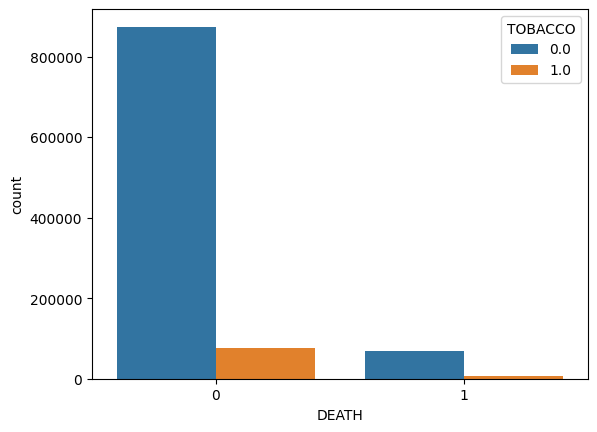

In [12]:
ax = sns.countplot(x='DEATH', data=data, hue='TOBACCO');

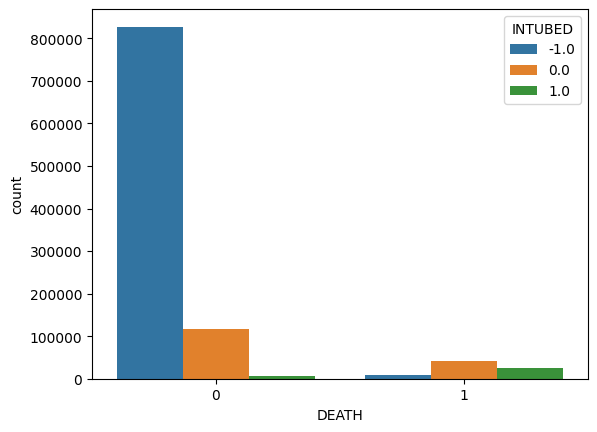

In [13]:
ax = sns.countplot(x='DEATH', data=data, hue='INTUBED');

In [14]:
N = 10
death = data['DATE_DIED'].value_counts().head(N+1).iloc[1:]
death

06/07/2020    984
07/07/2020    981
13/07/2020    969
16/06/2020    965
14/07/2020    921
16/07/2020    920
17/06/2020    914
29/06/2020    913
09/07/2020    911
15/07/2020    907
Name: DATE_DIED, dtype: int64

<BarContainer object of 10 artists>

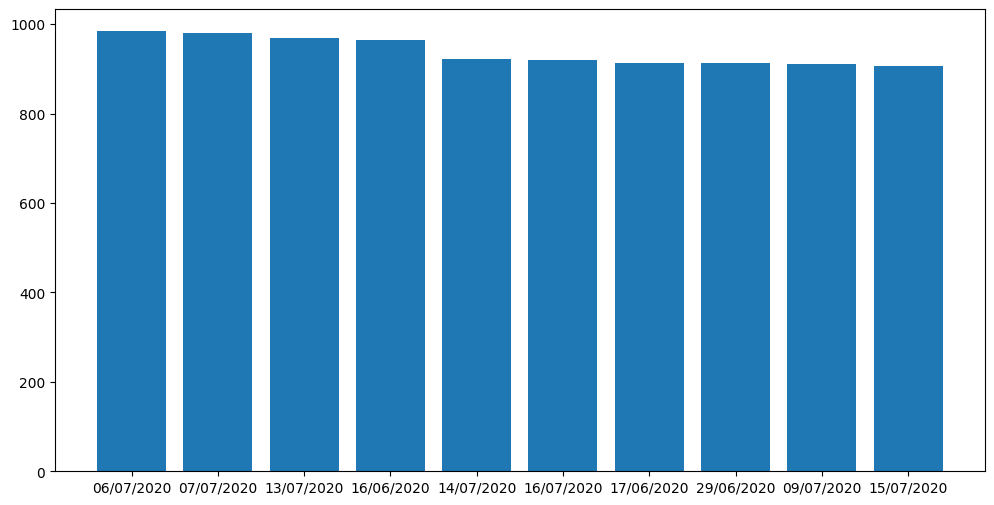

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(x=death.index, height=death.values)

# Imbalance Classification:

In [16]:
! pip install -U imbalanced-learn

In [17]:
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.under_sampling import RandomUnderSampler as RUS
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

In [18]:
X = data.drop(columns=['DATE_DIED', 'DEATH'])
y = data['DEATH']

In [19]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.35)

In [20]:
X_train.shape, y_train.shape 

((666348, 18), (666348,))

In [21]:
X_test.shape, y_test.shape

((358804, 18), (358804,))

In [22]:
(y_train==0).sum()/y_train.shape[0], (y_train==1).sum()/y_train.shape[0]

(0.9273877913642721, 0.07261220863572788)

In [23]:
ros = ROS(sampling_strategy=2/4)
X_train_ros, y_train_ros = ros.fit_resample(X=X_train, y=y_train)

In [24]:
rus = RUS(sampling_strategy=2/4)
X_train_rus, y_train_rus = rus.fit_resample(X=X_train, y=y_train)

In [25]:
smote = SMOTE(k_neighbors=7, sampling_strategy=2/4)
X_train_smote, y_train_smote = smote.fit_resample(X=X_train, y=y_train)

In [26]:
(y_train_ros==0).sum()/y_train_ros.shape[0], (y_train_ros==1).sum()/y_train_ros.shape[0]

(0.6666670262712742, 0.3333329737287258)

In [27]:
(y_train_rus==0).sum()/y_train_rus.shape[0], (y_train_rus==1).sum()/y_train_rus.shape[0]

(0.6666666666666666, 0.3333333333333333)

In [28]:
(y_train_smote==0).sum()/y_train_smote.shape[0], (y_train_smote==1).sum()/y_train_smote.shape[0]

(0.6666670262712742, 0.3333329737287258)

In [29]:
y_train_ros.shape, y_train_smote.shape

((926944,), (926944,))

In [30]:
y_train_rus.shape

(145155,)

In [31]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score

In [32]:
clf1 = RFC(n_estimators=20, criterion='gini').fit(X=X_train, y=y_train)

print('ACC = ', accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test)))
print('f1 = ', f1_score(y_true=y_test, y_pred=clf1.predict(X_test)))
print('rec = ', recall_score(y_true=y_test, y_pred=clf1.predict(X_test)))
print('pre = ', precision_score(y_true=y_test, y_pred=clf1.predict(X_test)))

ACC =  0.9437854650449827
f1 =  0.5809963022975612
rec =  0.531125375061719
pre =  0.6412031730019717


In [33]:
clf2 = RFC(n_estimators=20, criterion='gini').fit(X=X_train_ros, y=y_train_ros)

print('ACC = ', accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))
print('f1 = ', f1_score(y_true=y_test, y_pred=clf2.predict(X_test)))
print('rec = ', recall_score(y_true=y_test, y_pred=clf2.predict(X_test)))
print('pre = ', precision_score(y_true=y_test, y_pred=clf2.predict(X_test)))

ACC =  0.925675299049063
f1 =  0.5851662881498305
rec =  0.7143833795434692
pre =  0.4955344205284928


In [34]:
clf3 = RFC(n_estimators=20, criterion='gini').fit(X=X_train_rus, y=y_train_rus)

print('ACC = ', accuracy_score(y_true=y_test, y_pred=clf3.predict(X_test)))
print('f1 = ', f1_score(y_true=y_test, y_pred=clf3.predict(X_test)))
print('rec = ', recall_score(y_true=y_test, y_pred=clf3.predict(X_test)))
print('pre = ', precision_score(y_true=y_test, y_pred=clf3.predict(X_test)))

ACC =  0.9077267811953044
f1 =  0.5762230243452884
rec =  0.8549128337574537
pre =  0.4345618472112284


In [35]:
clf4 = RFC(n_estimators=20, criterion='gini').fit(X=X_train_smote, y=y_train_smote)

print('ACC = ', accuracy_score(y_true=y_test, y_pred=clf4.predict(X_test)))
print('f1 = ', f1_score(y_true=y_test, y_pred=clf4.predict(X_test)))
print('rec = ', recall_score(y_true=y_test, y_pred=clf4.predict(X_test)))
print('pre = ', precision_score(y_true=y_test, y_pred=clf4.predict(X_test)))

ACC =  0.9330776691452715
f1 =  0.5907835986229933
rec =  0.6583235215921608
pre =  0.5358125444372315


In [36]:
clf5 = ABC(n_estimators=20).fit(X=X_train, y=y_train)

print('ACC = ', accuracy_score(y_true=y_test, y_pred=clf5.predict(X_test)))
print('f1 = ', f1_score(y_true=y_test, y_pred=clf5.predict(X_test)))
print('rec = ', recall_score(y_true=y_test, y_pred=clf5.predict(X_test)))
print('pre = ', precision_score(y_true=y_test, y_pred=clf5.predict(X_test)))

ACC =  0.9466198816066711
f1 =  0.6008544336771908
rec =  0.547533138364541
pre =  0.6656815663095678


In [37]:
clf6 = ABC(n_estimators=20).fit(X=X_train_ros, y=y_train_ros)

print('ACC = ', accuracy_score(y_true=y_test, y_pred=clf6.predict(X_test)))
print('f1 = ', f1_score(y_true=y_test, y_pred=clf6.predict(X_test)))
print('rec = ', recall_score(y_true=y_test, y_pred=clf6.predict(X_test)))
print('pre = ', precision_score(y_true=y_test, y_pred=clf6.predict(X_test)))

ACC =  0.9183871974671408
f1 =  0.6037643938676373
rec =  0.8473546279767556
pre =  0.46895363013410685


In [38]:
clf7 = ABC(n_estimators=20).fit(X=X_train_rus, y=y_train_rus)

print('ACC = ', accuracy_score(y_true=y_test, y_pred=clf7.predict(X_test)))
print('f1 = ', f1_score(y_true=y_test, y_pred=clf7.predict(X_test)))
print('rec = ', recall_score(y_true=y_test, y_pred=clf7.predict(X_test)))
print('pre = ', precision_score(y_true=y_test, y_pred=clf7.predict(X_test)))

ACC =  0.917099586403719
f1 =  0.6007650493255486
rec =  0.85001329332675
pre =  0.464546662238459


In [39]:
clf8 = ABC(n_estimators=20).fit(X=X_train_smote, y=y_train_smote)

print('ACC = ', accuracy_score(y_true=y_test, y_pred=clf8.predict(X_test)))
print('f1 = ', f1_score(y_true=y_test, y_pred=clf8.predict(X_test)))
print('rec = ', recall_score(y_true=y_test, y_pred=clf8.predict(X_test)))
print('pre = ', precision_score(y_true=y_test, y_pred=clf8.predict(X_test)))

ACC =  0.9217706603047904
f1 =  0.6050124537382323
rec =  0.8164761289832504
pre =  0.48055170563776994
